In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
xlspath = 'lab_runs.xlsx'

In [3]:
xls = pd.ExcelFile(xlspath)
sheet_names = xls.sheet_names
runs = {}
for sheet_name in sheet_names:
    runs[sheet_name] = pd.read_excel(xls, sheet_name)
runs

{'Heart - C4.5':    Run  Hyperparameter: threshold  Hyperparameter: nfolds  Accuracy  \
 0    1                       0.05                      10     0.825   
 1    2                       0.10                      10     0.824   
 2    3                       0.10                      20     0.831   
 3    4                       0.10                      15     0.826   
 4    5                       0.05                      15     0.819   
 5    6                       0.01                      15     0.796   
 6    7                       0.05                       5     0.796   
 
    Precision: 0  Precision: 1  Recall: 0  Recall: 1  Selected  Runtime  
 0      0.817000      0.830000   0.783000   0.858000         1     0.32  
 1      0.867000      0.798000   0.715000   0.911000         0      NaN  
 2      0.878338      0.803787   0.721951   0.919291         0      NaN  
 3      0.863372      0.803136   0.724390   0.907480         0      NaN  
 4      0.814433      0.822642   0.7

In [27]:
runs['mushrooms - KNN']

,Run,Hyperparameter: k,Accuracy,Precision: e,Precision: p,Recall: e,Recall: p,Selected,Runtime
0,1,2,1,1,1,1,1,1,14.17
1,2,3,1,1,1,1,1,0,NaN


In [40]:
def plot_run(run, title, classifier = "c45"):
    if classifier not in ("c45", "rf", "knn"):
        raise Exception("Not a valid classifier")
    size = (10, 12)
    if classifier == "c45":
        new_run = run.set_index(['Run', 'Hyperparameter: threshold', 'Hyperparameter: nfolds'])
        new_run = new_run.drop(['Selected', 'Runtime'], axis=1)
        new_run.plot.line(figsize=size)
        plt.xlabel("(Run #, Threshold, Number of Folds)")
    elif classifier == "rf":
        new_run = run.set_index(['Run', 'Hyperparameter: NumAttributes', 'Hyperparameter: NumDataPoints', 'Hyperparameter: NumTrees'])
        new_run = new_run.drop(['Selected', 'Runtime'], axis=1)
        new_run.plot.line(figsize=size)
        plt.xlabel("(Run #, # Attributes, # Datapoints, # Trees)")
    elif classifier == "knn":
        new_run = run.set_index(['Run', 'Hyperparameter: k'])
        new_run = new_run.drop(['Selected', 'Runtime'], axis=1)
        new_run.plot.line(figsize=size)
        plt.xlabel("(Run #, # Neighbors)")
    plt.title(title)
    plt.xticks(rotation=90)
    plt.savefig(title + '.png')
    plt.show()

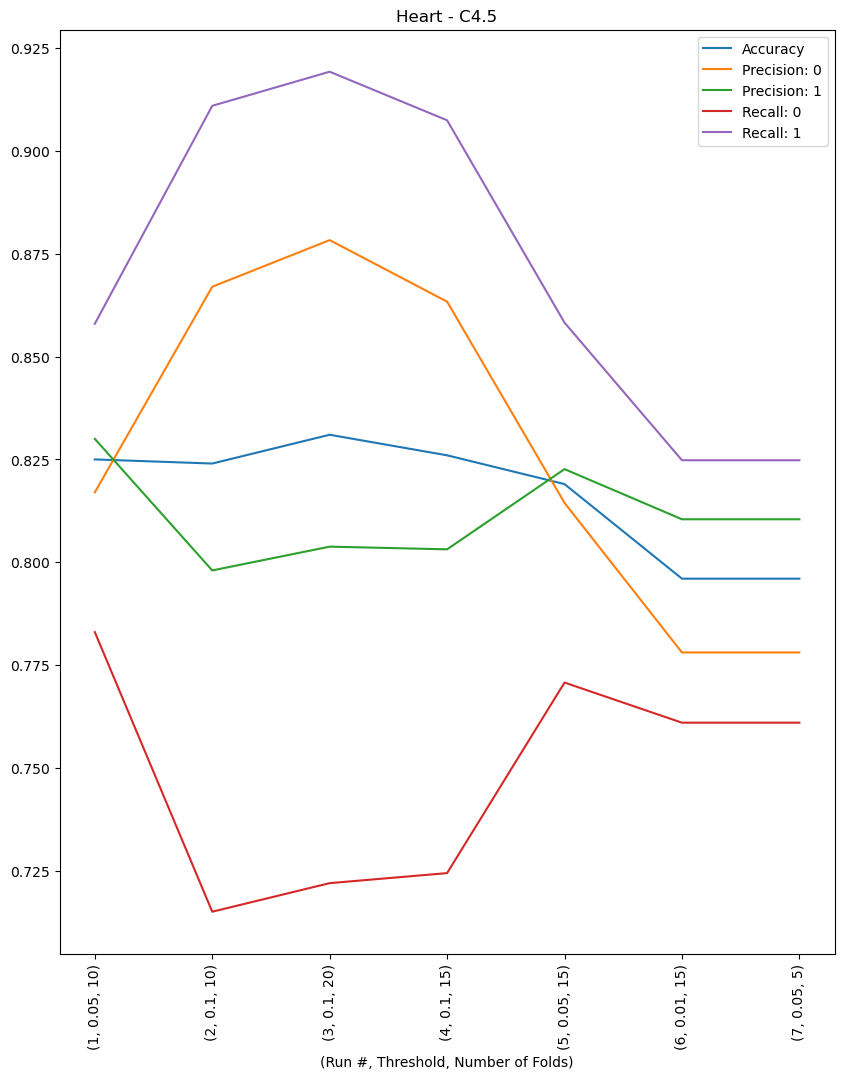

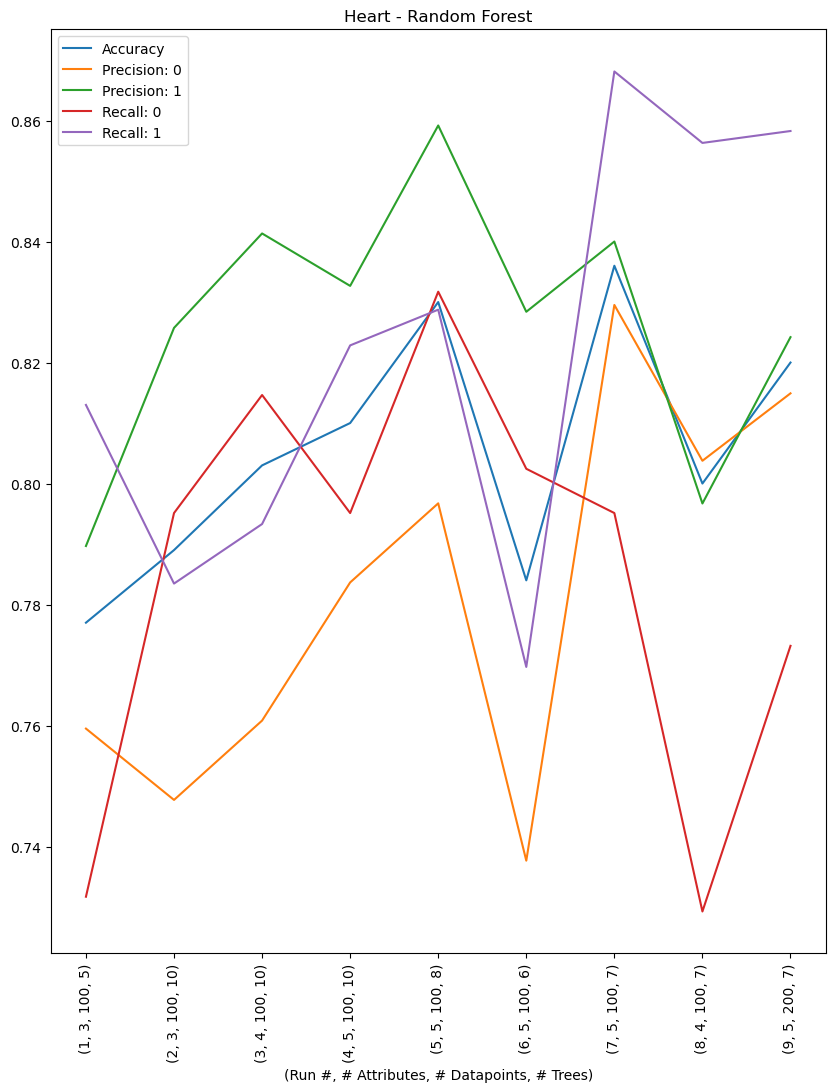

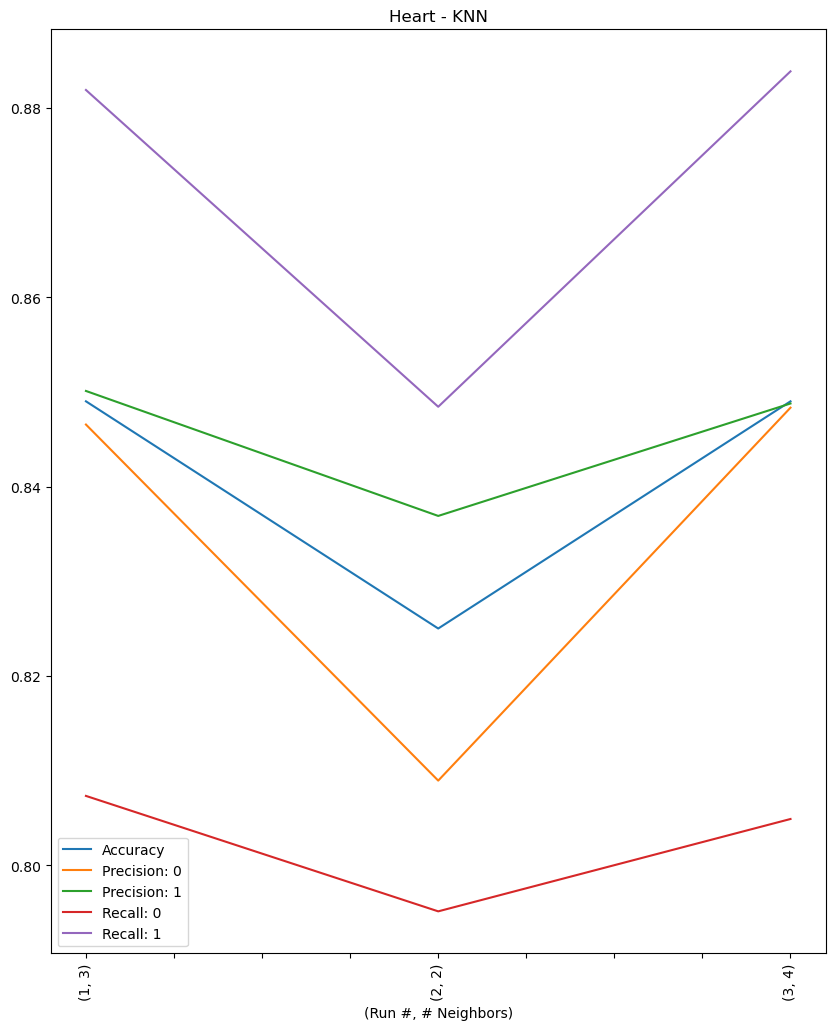

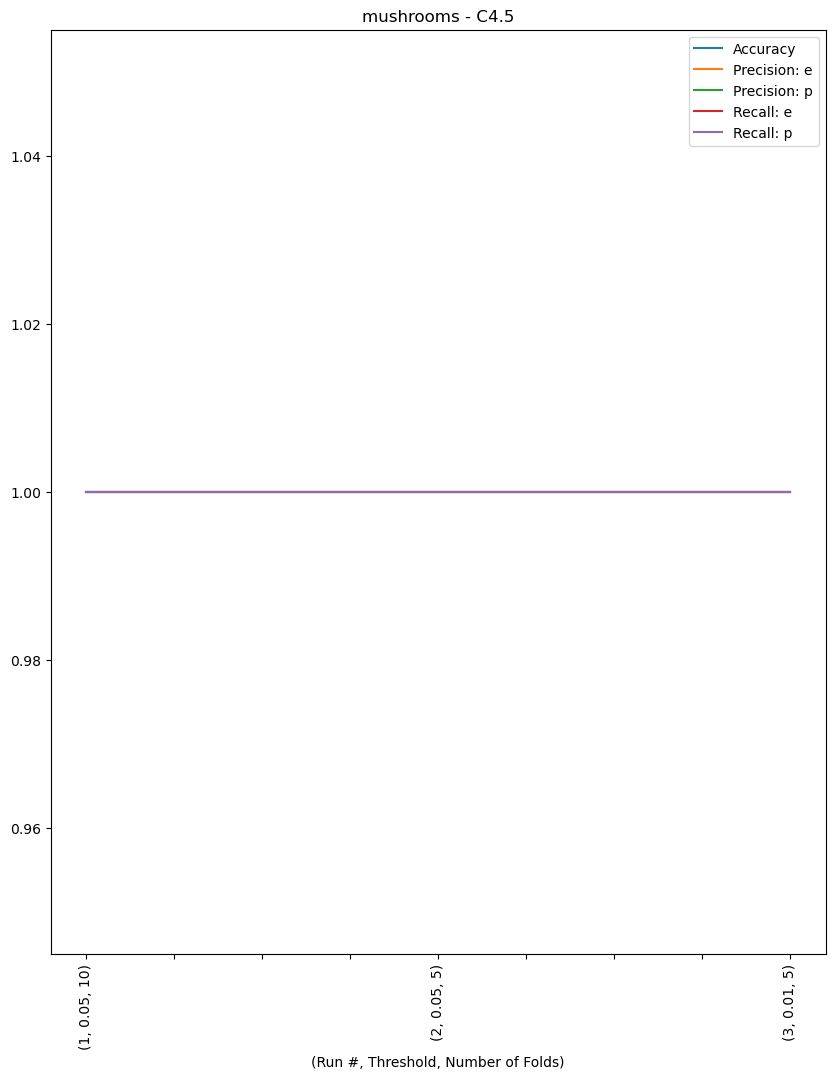

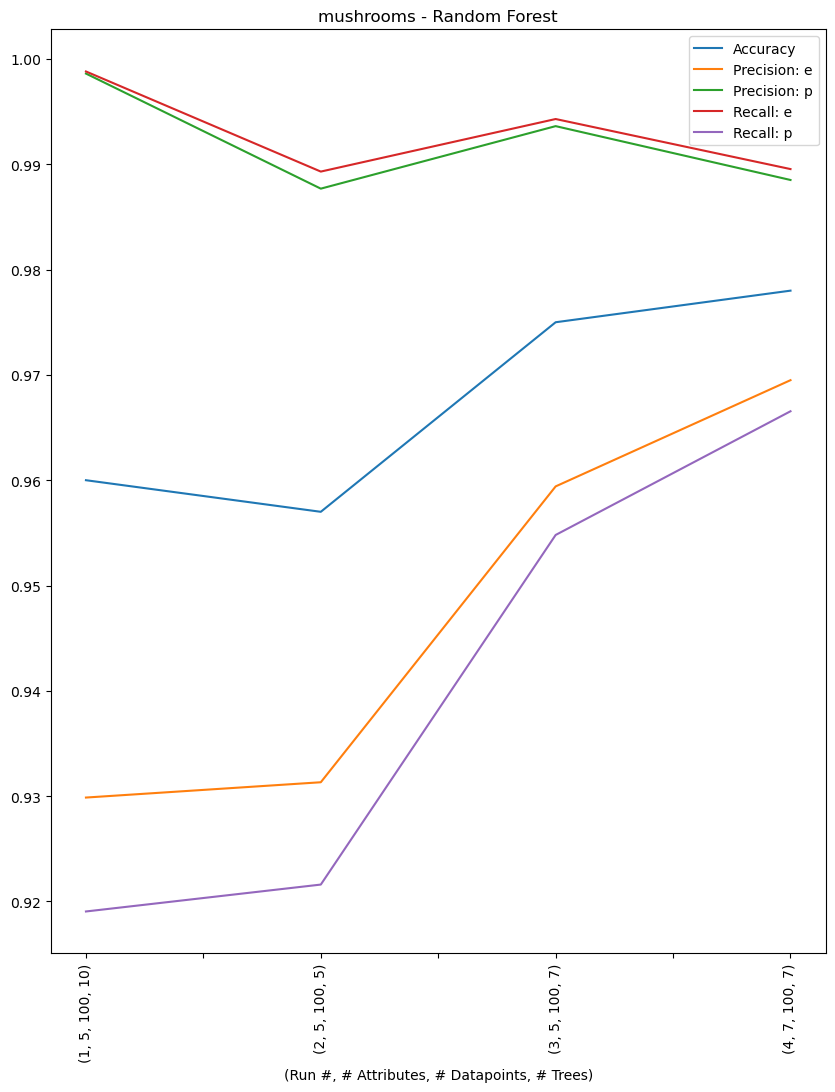

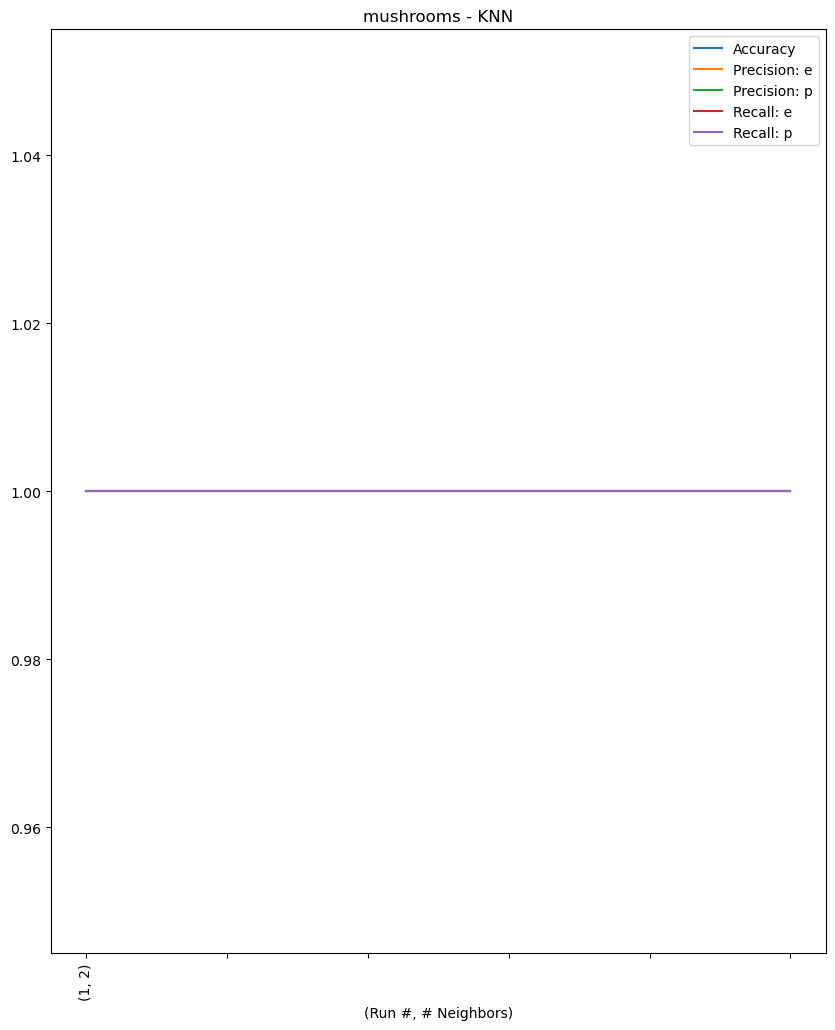

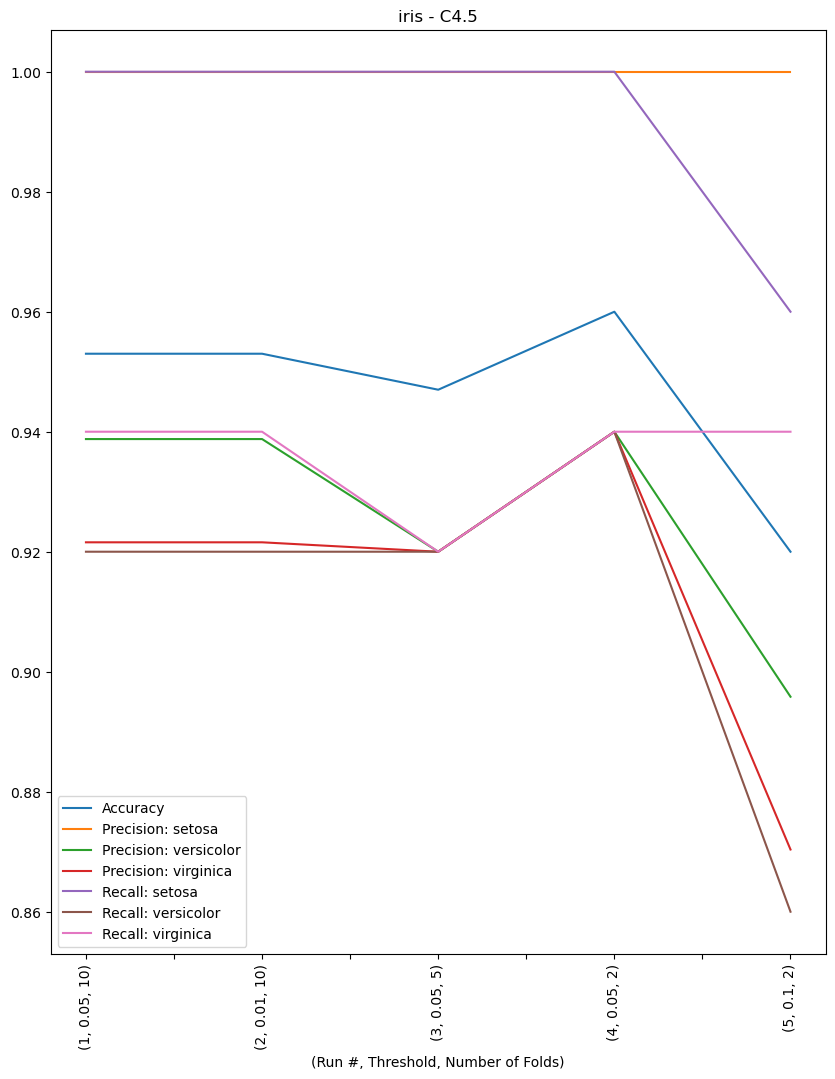

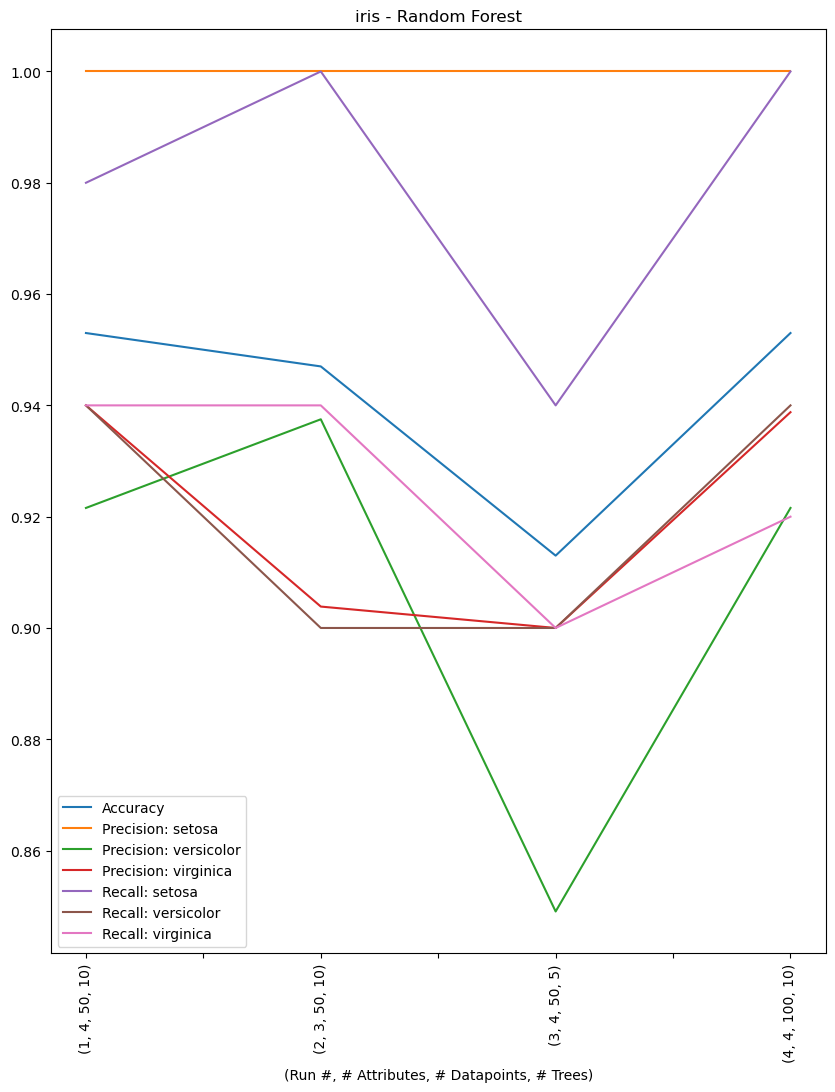

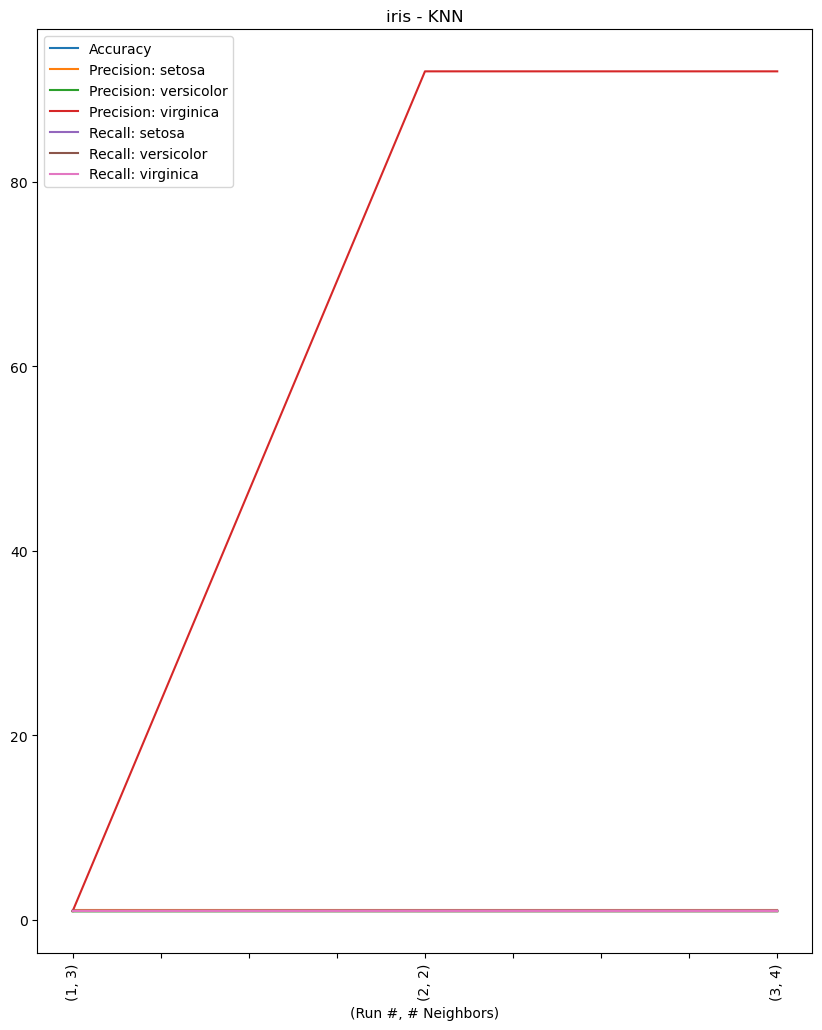

In [41]:
for key in runs.keys():
    if 'C4.5' in key:
        plot_run(runs[key], key, 'c45')
    elif 'Random Forest' in key:
        plot_run(runs[key], key, 'rf')
    elif 'KNN' in key:
        plot_run(runs[key], key, 'knn')